In [174]:
!ln -s ../https_hsts_scraper.py https_hsts_scraper.py

In [175]:
!ln -s ../https_preload_scraper.py https_preload_scraper.py

In [ ]:
from https_hsts_scraper import getHstsHeader
import numpy as np
import pandas as pd
import json 
import matplotlib.pyplot as plt
times = []
names = []  
ranks = [] 
with open("best_domains.json",'r') as file:
    jsonFile = json.load(file)
    for block in jsonFile : 
        name = block["rootDomain"].strip('\n ')
        domain = f"https://{name}"
        res =getHstsHeader(domain)
        if res  and res[0].days > 0 : 
            times.append(res[0].days)
            names.append(name)
            ranks.append( block["rank"])
            


In [177]:
times2 = times[:30]
names2 = names[:30]

In [180]:
df2 = pd.DataFrame([times2], columns=names2)

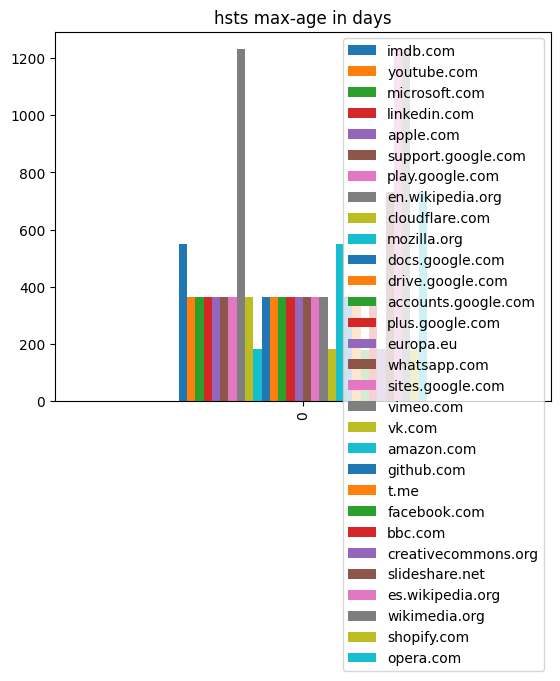

In [181]:
df2.plot.bar( title ="hsts max-age in days");

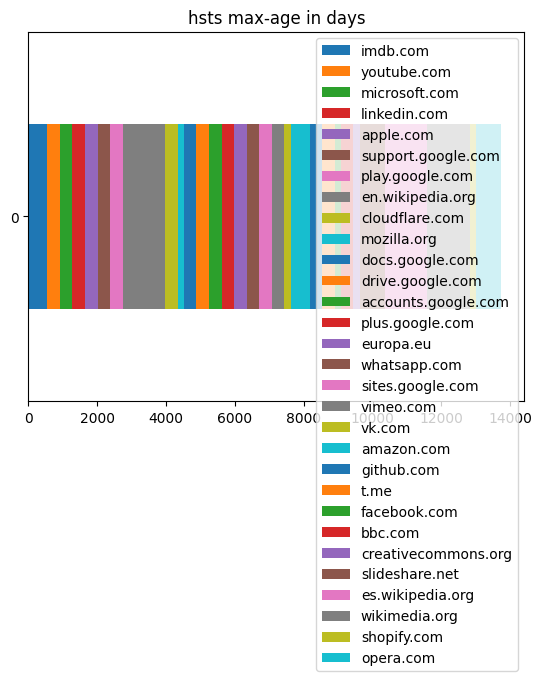

In [182]:
df2.plot.barh(stacked=True,title ="hsts max-age in days");

In [ ]:
import https_preload_scraper
resultPre = [] 
namesPre= []
ranksPre =[]  
with open("best_domains.json",'r') as file:
    for block in jsonFile : 
        name = block["rootDomain"].strip('\n ')
        resultPre.append(https_preload_scraper.is_preLoaded(name))
        namesPre.append(name)
        ranksPre.append(block["rank"])


In [183]:
df3 = pd.DataFrame({'is it pre-loaded': [ resultPre.count(True) , resultPre.count(False) ]  ,
                    },
                   index=["pre-loaded","not pre-loaded"])

In [ ]:
precentLoaded = resultPre.count(True) / len(resultPre)
precents = [round(precentLoaded*100,2),100 - round(precentLoaded*100,2)] 
print ( f'Loaded : {precents[0]}% , Not loaded : {precents[1]}% ')

Loaded : 37.25% , Not loaded : 62.75% 


In [ ]:
dfp = pd.DataFrame([[100]+precents], columns=["100%","Loaded","NotLoaded"])

<AxesSubplot: title={'center': 'precents websites that in hsts preloaded list'}>

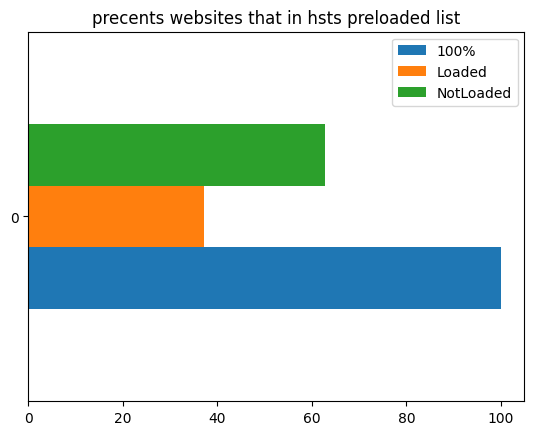

In [185]:
dfp.plot.barh(title="precents websites that in hsts preloaded list")

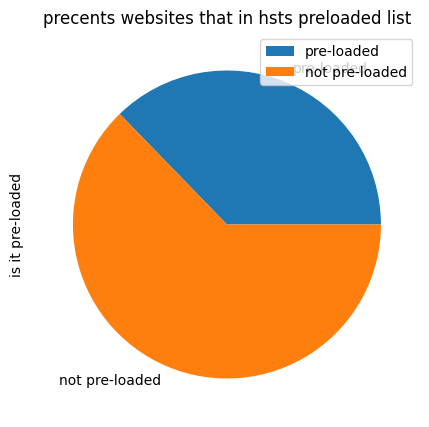

In [184]:
lot = df3.plot.pie(y='is it pre-loaded', figsize=(5, 5),title="precents websites that in hsts preloaded list")

In [ ]:
df4=pd.DataFrame([list(map(lambda x : int(x) + 0.1, resultPre))  ], columns=namesPre)

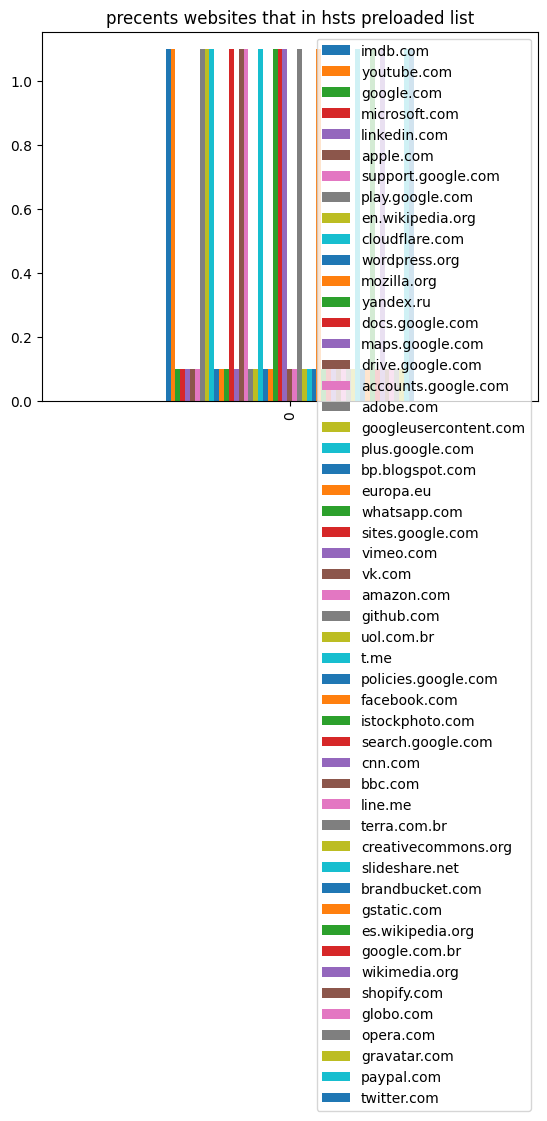

In [186]:

df4.plot.bar(title="precents websites that in hsts preloaded list");

In [ ]:
df5 = pd.DataFrame(map(int,resultPre))

<AxesSubplot: title={'center': 'precents websites that in hsts preloaded list'}>

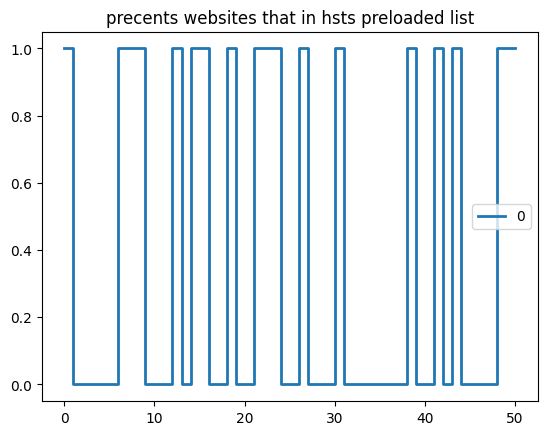

In [187]:
df5.plot(drawstyle="steps", linewidth=2,title="precents websites that in hsts preloaded list")